In [10]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as pplt 


In [13]:
# v1
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets('MNIST_data')


# v2
mnist = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

11493376/11490434 [==============================] - 2s 0us/step


In [17]:
(x_train, y_train), (x_test, y_test)=mnist

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


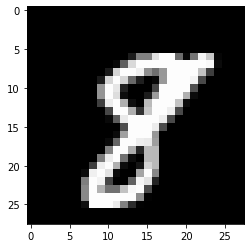

In [26]:
random_image=x_train[55]
# random_image_2d=random_image.reshape((28,28))
random_image.shape
pplt.imshow(random_image,cmap='gray')
pplt.show()

In [24]:
random_image_2d.shape

(28, 28)

In [47]:
feature_column = (tf.compat.v1.feature_column.numeric_column("x",shape=[28,28]))
feature_column

NumericColumn(key='x', shape=(28, 28), default_value=None, dtype=tf.float32, normalizer_fn=None)

In [42]:
classifier = tf.compat.v1.estimator.DNNClassifier(
    feature_columns = feature_column,
    hidden_units=[256,32],
    activation_fn = tf.compat.v1.nn.relu,
    optimizer = tf.compat.v1.train.AdamOptimizer(1e-4),
    n_classes=10,
    dropout=0.1,
    model_dir = "./mnist_model")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './mnist_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [55]:
train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x = {"x":x_train.astype(np.float32)},
    y = y_train.astype(np.int32),
    num_epochs= None,
    batch_size= 50,
    shuffle=True
)

In [56]:
classifier.train(input_fn=train_input_fn, steps=10000)

INFO:tensorflow:Calling model_fn.


ValueError: in user code:

    /Users/sijia.li/py3_kernel/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/canned/dnn.py:244 call  *
        net = self._input_layer(features)
    /Users/sijia.li/py3_kernel/lib/python3.7/site-packages/tensorflow/python/feature_column/feature_column.py:337 __call__  **
        from_template=True)
    /Users/sijia.li/py3_kernel/lib/python3.7/site-packages/tensorflow/python/ops/template.py:393 __call__
        return self._call_func(args, kwargs)
    /Users/sijia.li/py3_kernel/lib/python3.7/site-packages/tensorflow/python/ops/template.py:355 _call_func
        result = self._func(*args, **kwargs)
    /Users/sijia.li/py3_kernel/lib/python3.7/site-packages/tensorflow/python/feature_column/feature_column.py:181 _internal_input_layer
        feature_columns = _normalize_feature_columns(feature_columns)
    /Users/sijia.li/py3_kernel/lib/python3.7/site-packages/tensorflow/python/feature_column/feature_column.py:2334 _normalize_feature_columns
        'Given (type {}): {}.'.format(type(column), column))

    ValueError: Items of feature_columns must be a _FeatureColumn. Given (type <class 'str'>): x.
    
    originally defined at:
      File "/Users/sijia.li/py3_kernel/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/canned/dnn.py", line 97, in dnn_logit_fn
        name='dnn')
      File "/Users/sijia.li/py3_kernel/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/canned/dnn.py", line 180, in __init__
        create_scope_now=False)
      File "/Users/sijia.li/py3_kernel/lib/python3.7/site-packages/tensorflow/python/feature_column/feature_column.py", line 327, in __init__
        self._name, _internal_input_layer, create_scope_now_=create_scope_now)
      File "/Users/sijia.li/py3_kernel/lib/python3.7/site-packages/tensorflow/python/ops/template.py", line 161, in make_template
        **kwargs)
    


In [53]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()